In [2]:
import cv2
from tensorflow import keras
from keras.models import Sequential,load_model
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout,AveragePooling2D
from keras.utils import np_utils
from keras import losses
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import random
import math
from IPython.display import clear_output as clear
# from sklearn.model_selection import train_test_split

In [3]:
from tensorflow.python.client import device_lib 
print(device_lib.list_local_devices()) 

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 14353518229349242650
xla_global_id: -1
]


In [2]:
rgb_frame = []
rgb_label = []
gray_frame = []
gray_label = []
for label in range(14):
    for folder in range(2):
        for png_num in range(18000):
            filename = str(label)+'_'+str(png_num+1)+'.png'
            path = 'D:/chess_train_data/chess_train_picture'+str(folder)+'/'
            frame = cv2.imread(path+filename)
            frame = cv2.resize(frame,(56,56),interpolation=cv2.INTER_CUBIC)
            frame = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
            gray_label += [label]
            frame = np.array(frame) / 255.0
            gray_frame += [frame]
            print(path+filename)
            clear()
            
gray_label = np.array(gray_label)

In [4]:
rgb_frame_t = []
rgb_label_t = []
gray_frame_t = []
gray_label_t = []
for label in range(14):
    for folder in range(2):
        for png_num in range(5400):
            filename = str(label)+'_'+str(png_num+18000+1)+'.png'
            path = 'D:/chess_train_data/chess_train_picture'+str(folder)+'/'
            frame = cv2.imread(path+filename)
            frame = cv2.resize(frame,(56,56),interpolation=cv2.INTER_CUBIC)
            frame = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
            gray_label_t += [label]
            frame = np.array(frame) / 255.0
            gray_frame_t += [frame]
            print(path+filename)
            clear()
            
gray_label_t = np.array(gray_label_t)

In [3]:
'''np.save('D:/chess_train_data/chess_train/rgb_frame2',rgb_frame)
np.save('D:/chess_train_data/chess_train/rgb_label2',rgb_label)'''
np.save('D:/chess_train_data/chess_train/gray_frame_mix_56',gray_frame)
np.save('D:/chess_train_data/chess_train/gray_label_mix_56',gray_label)

In [2]:
gray_frame = np.load('D:/chess_train_data/chess_train/gray_frame_mix_56.npy')
gray_label = np.load('D:/chess_train_data/chess_train/gray_label_mix_56.npy')

In [5]:
'''np.save('D:/chess_train_data/chess_train/rgb_frame2',rgb_frame)
np.save('D:/chess_train_data/chess_train/rgb_label2',rgb_label)'''
np.save('D:/chess_train_data/chess_train/gray_frame_t_mix_56',gray_frame_t)
np.save('D:/chess_train_data/chess_train/gray_label_t_mix_56',gray_label_t)

In [3]:
def randSampe(x,y):
    # 根據樣本的數量，建立 1~ len(x) 的數列 a
    a = np.arange(len(x))
    
    # 將數列打亂，以作為 x (樣本) 跟  y (label) 的亂數次序
    random.shuffle(a)
    
    # 將 x,y 與已經打亂的數列 a 合併成 zx, zy 
    zx = zip(a,x)
    zy = zip(a,y)
    
    # 將 zx,zy 進行排序，此時 zx, zy 內的 x, y 陣列，順序已經被打亂  
    zx = sorted(zx,reverse=False)
    zy = sorted(zy,reverse=False)
    
    #將 zx,zy 重新解開，將已經打亂的 x,y 放在 x_train 及 y_train
    _ ,x_train = zip(*zx)
    _ ,y_train = zip(*zy)
    
    return np.array(x_train),np.array(y_train)

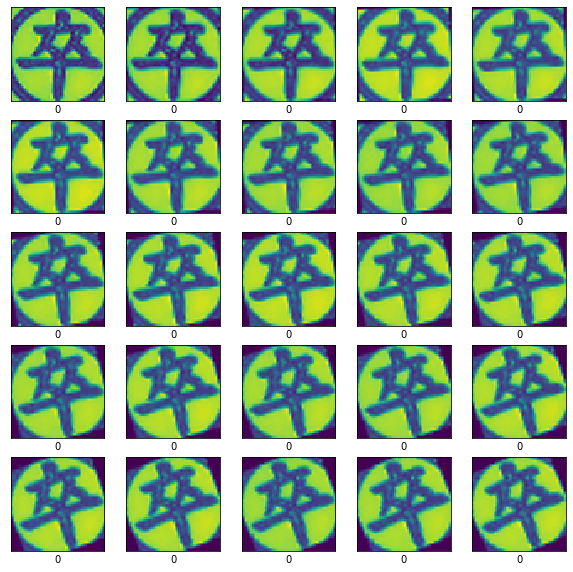

In [3]:
plt.figure(figsize=(10,10))
check_index = 0
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(gray_frame[i+check_index])
    plt.xlabel(gray_label[i+check_index])
plt.show()

In [4]:
model = keras.Sequential([
    keras.layers.Conv2D(64,(3,3),strides=(1,1),input_shape=(56,56,1),padding='same',activation='relu'),
    keras.layers.Conv2D(64,(3,3),strides=(1,1),padding='same',activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Conv2D(128,(3,3),strides=(1,1),padding='same',activation='relu'),
    keras.layers.Conv2D(128,(3,3),strides=(1,1),padding='same',activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Conv2D(256,(3,3),strides=(1,1),padding='same',activation='relu'),
    keras.layers.Conv2D(256,(3,3),strides=(1,1),padding='same',activation='relu'),
    keras.layers.Conv2D(256,(3,3),strides=(1,1),padding='same',activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Conv2D(512,(3,3),strides=(1,1),padding='same',activation='relu'),
    keras.layers.Conv2D(512,(3,3),strides=(1,1),padding='same',activation='relu'),
    keras.layers.Conv2D(512,(3,3),strides=(1,1),padding='same',activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(4096,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(4096,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1000,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(14,activation='softmax'),
])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [6]:
model = Sequential()
model.add(Conv2D(64,(3,3),strides=(1,1),input_shape=(56,56,1),padding='same',activation='relu'))
model.add(Conv2D(64,(3,3),strides=(1,1),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128,(3,2),strides=(1,1),padding='same',activation='relu'))
model.add(Conv2D(128,(3,3),strides=(1,1),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(256,(3,3),strides=(1,1),padding='same',activation='relu'))
model.add(Conv2D(256,(3,3),strides=(1,1),padding='same',activation='relu'))
model.add(Conv2D(256,(3,3),strides=(1,1),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(512,(3,3),strides=(1,1),padding='same',activation='relu'))
model.add(Conv2D(512,(3,3),strides=(1,1),padding='same',activation='relu'))
model.add(Conv2D(512,(3,3),strides=(1,1),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(4096,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1000,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(14,activation='softmax'))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 56, 56, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 56, 56, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 28, 28, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 128)       49280     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 256)       2

In [8]:
model.compile(optimizer='adam',
              loss= 'categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
from keras.optimizers import Adam
model.compile(optimizer=Adam(lr=0.00001, beta_1=0.9, beta_2=0.999, epsilon=1e-08),loss = 'categorical_crossentropy',metrics=['accuracy'])

In [7]:
gray_frame1 = np.reshape(gray_frame,[-1,56,56,1])
gray_label1 = np_utils.to_categorical(gray_label, num_classes=14)

In [ ]:
gen = ImageDataGenretor(featurewise_center=False,
                        rotation_range=40, # 角度值，0~180，影象旋轉
                        width_shift_range=0.2, # 水平平移，相對總寬度的比例
                        height_shift_range=0.2, # 垂直平移，相對總高度的比例
                        shear_range=0.2, # 隨機錯切換角度
                        zoom_range=0.2, # 隨機縮放範圍
                        horizontal_flip=True, # 一半影象水平翻轉
                        fill_mode='nearest' # 填充新建立畫素的方法
                       )

In [8]:
history = model.fit(gray_frame1,gray_label1, epochs=15
                    ,batch_size=360)

Epoch 1/15
504000/504000 [==============================] - 1461s 3ms/sample - loss: 1.0146 - acc: 0.6373
Epoch 2/15
504000/504000 [==============================] - 1340s 3ms/sample - loss: 0.0488 - acc: 0.9875
Epoch 3/15
504000/504000 [==============================] - 1034s 2ms/sample - loss: 0.0103 - acc: 0.9974
Epoch 4/15
504000/504000 [==============================] - 1031s 2ms/sample - loss: 0.1059 - acc: 0.9867
Epoch 5/15
504000/504000 [==============================] - 915s 2ms/sample - loss: 0.0033 - acc: 0.9994
Epoch 6/15
504000/504000 [==============================] - 923s 2ms/sample - loss: 0.0674 - acc: 0.9891
Epoch 7/15
504000/504000 [==============================] - 918s 2ms/sample - loss: 0.0032 - acc: 0.9995
Epoch 8/15
504000/504000 [==============================] - 930s 2ms/sample - loss: 0.0012 - acc: 0.9998
Epoch 9/15
504000/504000 [==============================] - 921s 2ms/sample - loss: 0.0437 - acc: 0.9926
Epoch 10/15
504000/504000 [========================

In [12]:
check_history = model.evaluate(gray_frame1, gray_label1)

504000/504000 [==============================] - 371s 736us/sample - loss: 7.2336e-06 - acc: 1.0000- loss: 7.2395e-06 - acc: 1


In [10]:
check_history

[7.2336139225085255e-06, 1.0]

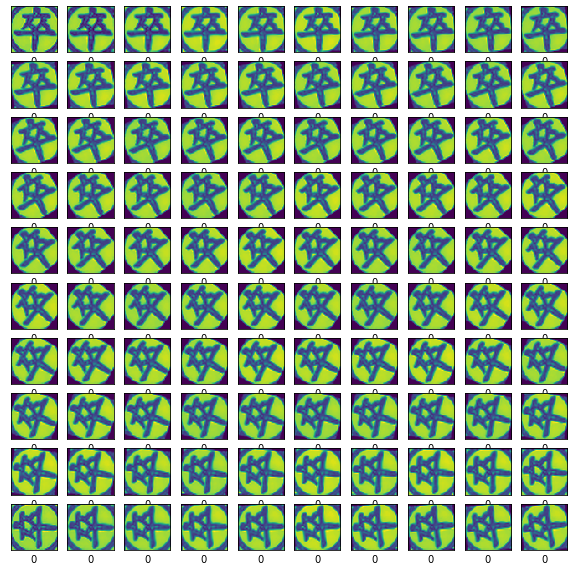

In [15]:
plt.figure(figsize=(10,10))
predict_index = 0
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])    
    plt.grid(False)
    a = gray_frame[predict_index+i].reshape([-1,56,56,1])
    m = model.predict(a)
    plt.imshow(gray_frame[predict_index+i])
    plt.xlabel(m.argmax())
plt.show()

In [11]:
model.save('cnn_darkchess_model.h5')
model.save_weights('cnn_darkchess_weights.h5')

In [25]:
import pandas as pd 
predictions = model.predict_classes(gray_frame1) 
pd.crosstab(gray_label, predictions, rownames=['實際值'], colnames=['預測值'])

預測值,0,1,2,3,4,5,6,7,8,9,10,11,12,13
實際值,,,,,,,,,,,,,,
0,36000,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,36000,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,36000,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,36000,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,36000,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,36000,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,36000,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,36000,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,36000,0,0,0,0,0


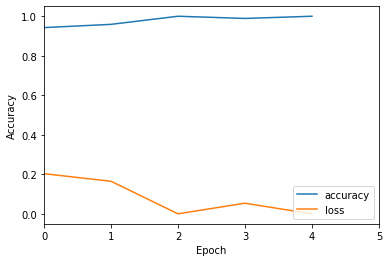

In [15]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['loss'], label = 'loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([-0.05, 1.05])
plt.xlim([0, 5])
plt.legend(loc='lower right')